Lab 1 (Word2Vec) 
<br>
 **Abiyr Maira**
 <br>
 **19MD0183**

In [0]:
import re, string 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import pandas as pd  # For data handling
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm
from collections import defaultdict
from nltk.corpus import stopwords

In [149]:
df = pd.read_csv('/content/gdrive/My Drive/colab_datasets/BBC-news.csv')
df.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [150]:
STOPWORDS = set(stopwords.words('english'))
def preprocessing(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

df_pre = pd.DataFrame(df.text.apply(lambda x: preprocessing(x)))
df_pre.head(5)

,text
0,tv future hands viewers home theatre systems p...
1,worldcom boss left books alone former worldcom...
2,tigers wary farrell gamble leicester say rushe...
3,yeading face newcastle fa cup premiership side...
4,ocean twelve raids box office ocean twelve cri...


In [0]:
## Train word2vec model  
data = [row.split(' ') for row in df_pre['text']]     
model = Word2Vec(data, min_count= 50,size= 100,workers=4, window = 3, sg = 1)

In [167]:
model.most_similar('america')[:10]

[('asia', 0.9164611101150513),
 ('korea', 0.8950649499893188),
 ('north', 0.869915783405304),
 ('asian', 0.8598249554634094),
 ('indian', 0.8588401079177856),
 ('air', 0.8586961030960083),
 ('currency', 0.8510556221008301),
 ('japanese', 0.8406628370285034),
 ('india', 0.8404205441474915),
 ('japan', 0.8376864790916443)]

In [0]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

  
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt

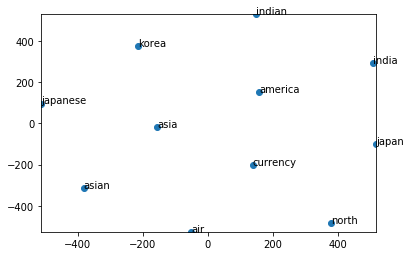

In [170]:
display_closestwords_tsnescatterplot(model,'america',100)